In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df=pd.DataFrame(np.c_[iris.target,iris.data],
                columns=np.append(['target'],iris.feature_names))
df.head()

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.0,5.1,3.5,1.4,0.2
1,0.0,4.9,3.0,1.4,0.2
2,0.0,4.7,3.2,1.3,0.2
3,0.0,4.6,3.1,1.5,0.2
4,0.0,5.0,3.6,1.4,0.2


In [5]:
x=scale(iris.data)
y=pd.DataFrame(iris.target)
variables=iris.feature_names
x[1:10]

array([[-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [10]:
variables

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
clustering=KMeans(n_clusters=3,random_state=5)
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=5, tol=0.0001, verbose=0)

In [7]:
y.columns=['Target']

In [8]:
color_theme=np.array(['darkgrey','green','powderblue'])

Text(0.5, 1.0, 'Ground Truth Classification')

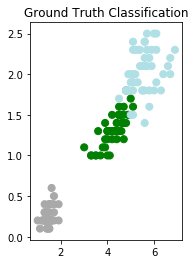

In [13]:
plt.subplot(1,2,1)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
            c=color_theme[iris.target],s=50)
plt.title("Ground Truth Classification")
plt.show()

Text(0.5, 1.0, 'KMeans Clustering Classification')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.77      0.72      0.74        50

   micro avg       0.24      0.24      0.24       150
   macro avg       0.26      0.24      0.25       150
weighted avg       0.26      0.24      0.25       150



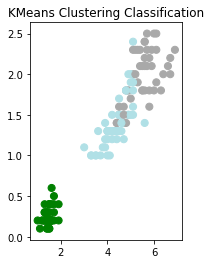

In [17]:
plt.subplot(1,2,2)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
            c=color_theme[clustering.labels_],s=50)
plt.title("KMeans Clustering Classification")
relabel=np.choose(clustering.labels_,[2,1,0])
print(classification_report(y,relabel))
plt.show()

Text(0.5, 1.0, 'Ground Truth Classification')

Text(0.5, 1.0, 'KMeans Clustering Classification')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.77      0.72      0.74        50

   micro avg       0.24      0.24      0.24       150
   macro avg       0.26      0.24      0.25       150
weighted avg       0.26      0.24      0.25       150



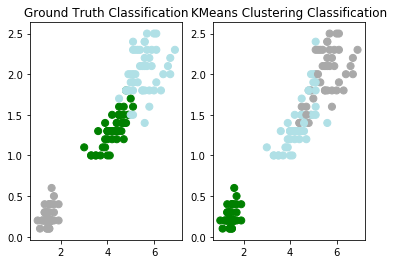

In [18]:
plt.subplot(1,2,1)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
            c=color_theme[iris.target],s=50)
plt.title("Ground Truth Classification")
plt.subplot(1,2,2)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],
            c=color_theme[clustering.labels_],s=50)
plt.title("KMeans Clustering Classification")
relabel=np.choose(clustering.labels_,[2,1,0])
print(classification_report(y,relabel))
plt.show()